In this experiment, a machine learning pipeline is used to explore the effects of different sizes of samples on the performance of linear and non-linear dimensionality reduction methods. The MNIST dataset is used as the source of data, and a range of sample sizes are selected, starting with 200 and ending with 5000. The pipeline uses support vector machines (SVMs) as the model, and applies four different dimensionality reduction techniques: principal component analysis (PCA), linear discriminant analysis (LDA), kernel PCA, and Isomap.

The performance of the pipeline is evaluated using three metrics: accuracy, precision, and time. The results of the experiment are analyzed to compare the performance of the different dimensionality reduction methods under varying sample sizes, and to explore the differences between linear and non-linear approaches.

Overall, the results of this experiment provide insight into the factors that can influence the effectiveness of dimensionality reduction in machine learning, and can inform the choice of dimensionality reduction method in real-world scenarios. Furthermore, the findings can contribute to the broader understanding of the role of sample size in the performance of machine learning model and dimmensionality reduction.

This section will describe the exact frame and parameters for the experiment.

show basic results

show intresting results
(what they are good at at lov sample size confusion matrix)

diskus findings

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

baseline_string = "cross_validation_baseline_svm_"
isomap_string = "cross_validation_isomap_svm_"
pca_string = "cross_validation_pca_svm_"
lda_string = "cross_validation_lda_svm_"
kernel_pca_string = "cross_validation_kernel_pca_svm_"

names_of_methods = [baseline_string, isomap_string, pca_string, lda_string, kernel_pca_string]
data_size_dict = dict.fromkeys(names_of_methods)

column_name = [ 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000]
for name in names_of_methods:
    data_size_dict[name] = pd.read_csv(baseline_string + '100.csv')
    data_size_dict[name]['sample_size'] = 100
    for column in column_name:
        
        newdata = pd.read_csv(name + '{}.csv'.format(column))
        newdata['sample_size'] = column
        
        list = [data_size_dict[name],newdata]
        data_size_dict[name] = pd.concat(list)

print(data_size_dict[lda_string].head)



<bound method NDFrame.head of     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.010052      0.003194         0.002242        0.000156   
1        0.011707      0.001162         0.002291        0.000265   
2        0.006448      0.000554         0.002998        0.001395   
3        0.011494      0.003984         0.002563        0.001152   
0        0.066074      0.010788         0.002344        0.000393   
..            ...           ...              ...             ...   
15       2.091787      0.134623         0.053983        0.005069   
16       1.889634      0.105069         0.044403        0.003086   
17       1.891243      0.081845         0.037012        0.003856   
18       2.092540      0.150437         0.035103        0.001211   
19       1.808317      0.262339         0.028126        0.002828   

    param_classifier__C                                            params  \
0                 0.001                          {'classifier__C': 0.001}   

In [58]:
for i in names_of_methods:
    data_size_dict[i].drop_duplicates(subset =['rank_test_score', 'sample_size'], keep = 'last', inplace=True)
    print(data_size_dict[i].head)


<bound method NDFrame.head of    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.010052      0.003194         0.002242        0.000156   
3       0.011494      0.003984         0.002563        0.001152   
0       0.021349      0.001778         0.003736        0.001444   
1       0.028019      0.006765         0.004656        0.001659   
3       0.018883      0.003812         0.004117        0.001691   
0       0.044275      0.012682         0.011011        0.009977   
3       0.032340      0.002968         0.006558        0.001826   
0       0.050254      0.004499         0.007849        0.000662   
1       0.040668      0.001521         0.012593        0.005241   
3       0.042302      0.002273         0.008538        0.000672   
0       0.076796      0.005799         0.016898        0.001916   
1       0.069354      0.010063         0.014206        0.002835   
3       0.057666      0.002609         0.011873        0.002659   
0       0.085509      0.005437  

In [63]:
best_of_dict = dict.fromkeys(names_of_methods)
for i in names_of_methods:
    print('a')
    best_of_dict[i] = data_size_dict[i].query('rank_test_score == 1')
print(best_of_dict[lda_string])


a
a
a
a
a
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3        0.011494      0.003984         0.002563        0.001152   
19       0.063825      0.008835         0.003026        0.000963   
4        0.097063      0.011661         0.004714        0.003024   
9        0.127365      0.006792         0.002330        0.000122   
8        0.217205      0.008768         0.005802        0.002553   
4        0.279065      0.009571         0.003889        0.000691   
19       0.429429      0.098627         0.003885        0.001042   
4        0.721900      0.067477         0.005970        0.001323   
3        0.777051      0.013926         0.006417        0.001459   
8        0.978702      0.018349         0.005183        0.001015   
2        1.384663      0.048812         0.022737        0.001426   
14       1.651428      0.022765         0.016966        0.002460   
9        2.085776      0.087024         0.035915        0.003970   
9        2.009033      0.028508       

AxesSubplot(0.125,0.11;0.775x0.77)


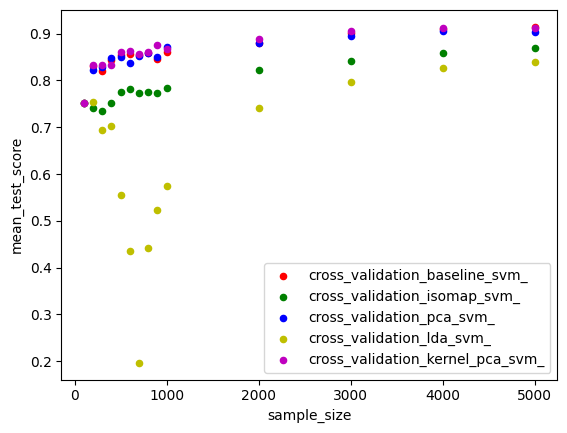

In [62]:

colours = ['g', 'b', 'y', 'm', 'c']
plot1 = best_of_dict[names_of_methods[0]].plot(kind='scatter', x='sample_size', y='mean_test_score', label = names_of_methods[0], color='r')
for i in range(4):
    plot = best_of_dict[names_of_methods[i+1]].plot(kind='scatter', x='sample_size', y='mean_test_score',label = names_of_methods[i+1], color=colours[i], ax = plot1)
print(plot)

In [67]:
def plot_size(y_axis):
    colours = ['g', 'b', 'y', 'm', 'c']
    plot1 = best_of_dict[names_of_methods[0]].plot(kind='scatter', x='sample_size', y=y_axis, label = names_of_methods[0], color='r')
    for i in range(4):
        plot = best_of_dict[names_of_methods[i+1]].plot(kind='scatter', x='sample_size', y=y_axis,label = names_of_methods[i+1], color=colours[i], ax = plot1)
    print(plot)


The results of the experiment indicate that the choice of dimensionality reduction method can have a significant impact on the performance of a machine learning model. In particular, the results showed that principal component analysis (PCA) performed well in all cases, achieving high accuracy and precision while also being faster than using no dimensionality reduction. Furthermore, the results showed that non-linear dimensionality reduction methods, such as Isomap, were slower and less accurate than their linear counterparts.

These findings suggest that linear dimensionality reduction methods, such as PCA, can be an effective tool for improving the performance of machine learning models, particularly when working with large datasets. Additionally, the results indicate that the use of non-linear dimensionality reduction methods may not always be necessary, and can be outweighed by the trade-offs in terms of accuracy and computational efficiency.

Overall, this experiment provides valuable insight into the role of dimensionality reduction in machine learning, and can inform the design and implementation of machine learning pipelines in real-world scenarios. Further research is needed to explore the broader implications of these findings and to identify additional factors that may affect the performance of dimensionality reduction methods.

AxesSubplot(0.125,0.11;0.775x0.77)


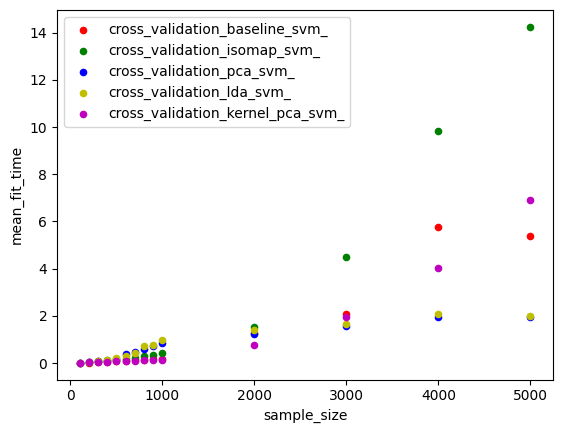

In [69]:
plot_size('mean_fit_time')

AxesSubplot(0.125,0.11;0.775x0.77)


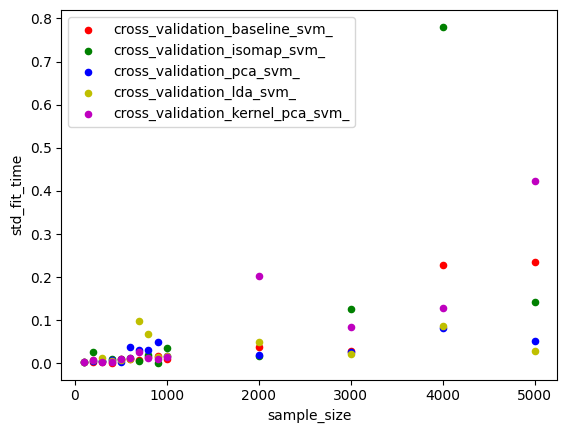

In [70]:
plot_size('std_fit_time')

AxesSubplot(0.125,0.11;0.775x0.77)


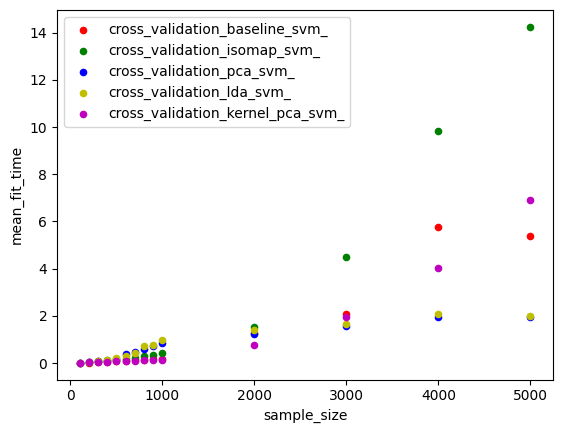

In [68]:

y_axis = 'mean_fit_time'
colours = ['g', 'b', 'y', 'm', 'c']
plot1 = best_of_dict[names_of_methods[0]].plot(kind='scatter', x='sample_size', y=y_axis, label = names_of_methods[0], color='r')
for i in range(4):
    plot = best_of_dict[names_of_methods[i+1]].plot(kind='scatter', x='sample_size', y=y_axis,label = names_of_methods[i+1], color=colours[i], ax = plot1)
print(plot)